In [1]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Rat tumor data

In [2]:
tumers = [
    0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,1,1,1,1,1,1,
    1,1,2,2,2,2,2,2,2,2,
    2,1,5,2,5,3,2,7,7,3,
    3,2,9,10,4,4,4,4,4,4,
    4,10,4,4,4,5,11,12,5,5,
    6,5,6,6,6,6,16,15,15,9
]

n = [
    20,20,20,20,20,20,20,19,19,19,
    19,18,18,17,20,20,20,20,19,20,
    18,18,25,24,23,20,20,20,20,20,
    20,10,49,19,46,27,17,49,47,20,
    20,13,48,50,20,20,20,20,20,20,
    20,48,19,19,19,22,46,49,20,20,
    23,19,22,20,20,20,52,47,46,24
    ]

group_idx = np.repeat(np.arange(len(n)), n)

data=[]

for i in range(0, len(n)):
    data.extend(np.repeat([1, 0], [tumers[i], n[i] - tumers[i]]))

## Bayesian Analyses

In [3]:
pm_rat = pm.Model()

with pm_rat:
    # Hyper priors
    alpha = pm.HalfCauchy('alpha', beta=10)
    
    beta = pm.HalfCauchy('beta', beta=10)
    
    # Prior distribution - beta with alpha, beta params
    theta = pm.Beta('theta', alpha, beta, shape=len(n))
    
    # Likelihood - Independent binomial distribution
    y = pm.Bernoulli('y', p=theta[group_idx], observed=data)
    
    trace = pm.sample(2000)


C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -729.75: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:55<00:00, 3608.98it/s]
Finished [100%]: Average ELBO = -729.71
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:18<00:00, 107.44it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A5353D198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028A56F01668>]], dtype=object)

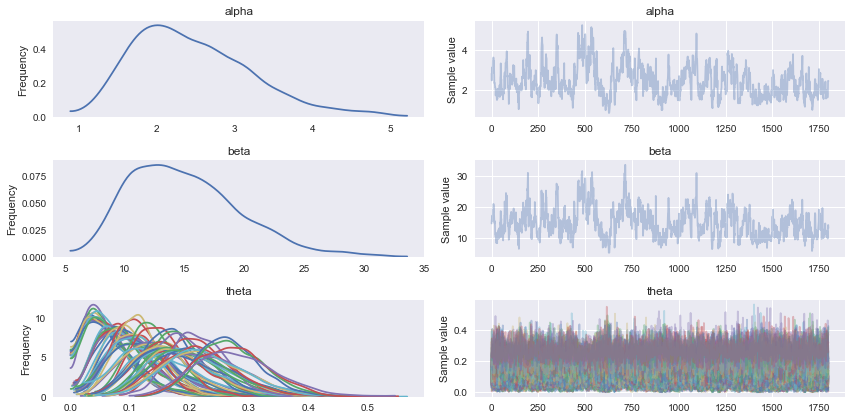

In [4]:
chain_r = trace[200:]
pm.traceplot(chain_r)

In [5]:
pm.df_summary(chain_r)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,2.465287,0.769550,0.061719,1.170796,4.026130
beta,15.040307,4.625302,0.364154,6.663275,23.378112
theta__0,0.064056,0.042068,0.001252,0.002416,0.145566
theta__1,0.064336,0.039713,0.001287,0.001295,0.140026
theta__2,0.064322,0.041542,0.001222,0.003632,0.144906
theta__3,0.062716,0.038112,0.001196,0.006168,0.140129
theta__4,0.063802,0.042644,0.001255,0.001463,0.145812
theta__5,0.063392,0.040273,0.001198,0.001518,0.141720
theta__6,0.064118,0.043517,0.001269,0.001279,0.148407
theta__7,0.065818,0.044786,0.001337,0.002331,0.151459


### Aanalysing the estimated Prior

Sampling from the joint posterior distribution of paramters and hyperparameters

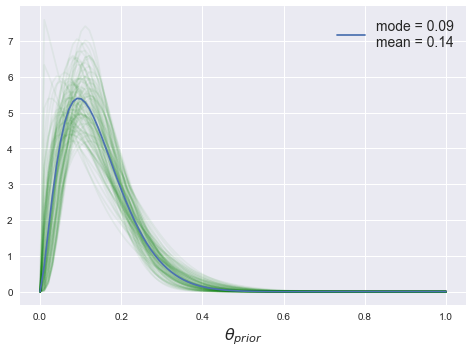

In [6]:
x = np.linspace(0, 1, 100)

for i in np.random.randint(0, len(chain_r), size=100):
    pdf = stats.beta(chain_r['alpha'][i], chain_r['beta'][i]).pdf(x)
    plt.plot(x, pdf, 'g', alpha=0.05)
    
dist=stats.beta(chain_r['alpha'].mean(), chain_r['beta'].mean())
pdf = dist.pdf(x)
mode=x[np.argmax(pdf)]
mean=dist.moment(1)
plt.plot(x, pdf, label='mode = {:.2f}\nmean = {:.2f}'.format(mode, mean))

plt.legend(fontsize=14)
plt.xlabel(r'$\theta_{prior}$', fontsize=16)

## Plotting the Posterior

In [8]:
y_pred = pm.sample_ppc(chain_r, 100, pm_rat, size=len(data))


  0%|                                                                                                                                                         | 0/100 [00:00<?, ?it/s]INFO (theano.gof.compilelock): Waiting for existing lock by unknown process (I am process '18428')
INFO (theano.gof.compilelock): To manually release the lock, delete C:\Users\Christie_M\AppData\Local\Theano\compiledir_Windows-10-10.0.14393-SP0-Intel64_Family_6_Model_63_Stepping_2_GenuineIntel-3.6.0-64\lock_dir
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:28<00:00,  3.74it/s]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:2641: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


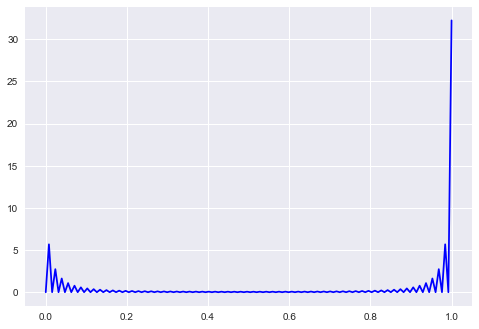

In [12]:
data = np.array(data)
sns.kdeplot(data, c='b')

dict_keys(['y'])


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:2641: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


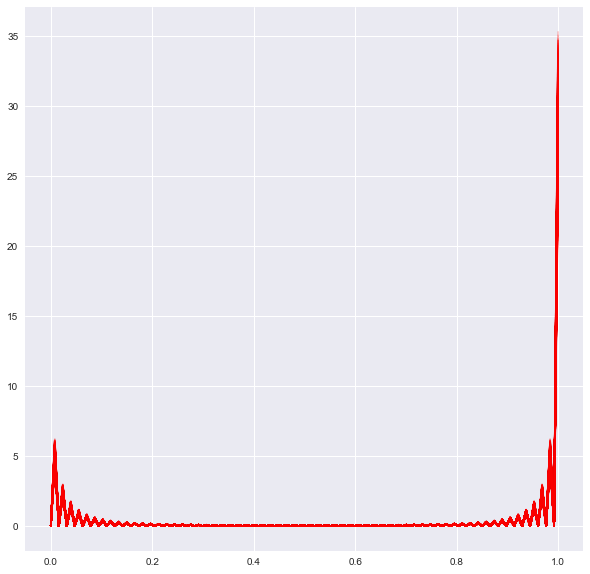

In [23]:
print(y_pred.keys())
counter = 0
plt.rcParams['figure.figsize']=(10,10)
for i in y_pred['y']:
    for j in i:
        sns.kdeplot(j, c='r', alpha=0.2)
    #counter += 1
    #if counter > 10:
    break

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A1BD546A0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000028A1FCB2EF0>], dtype=object)

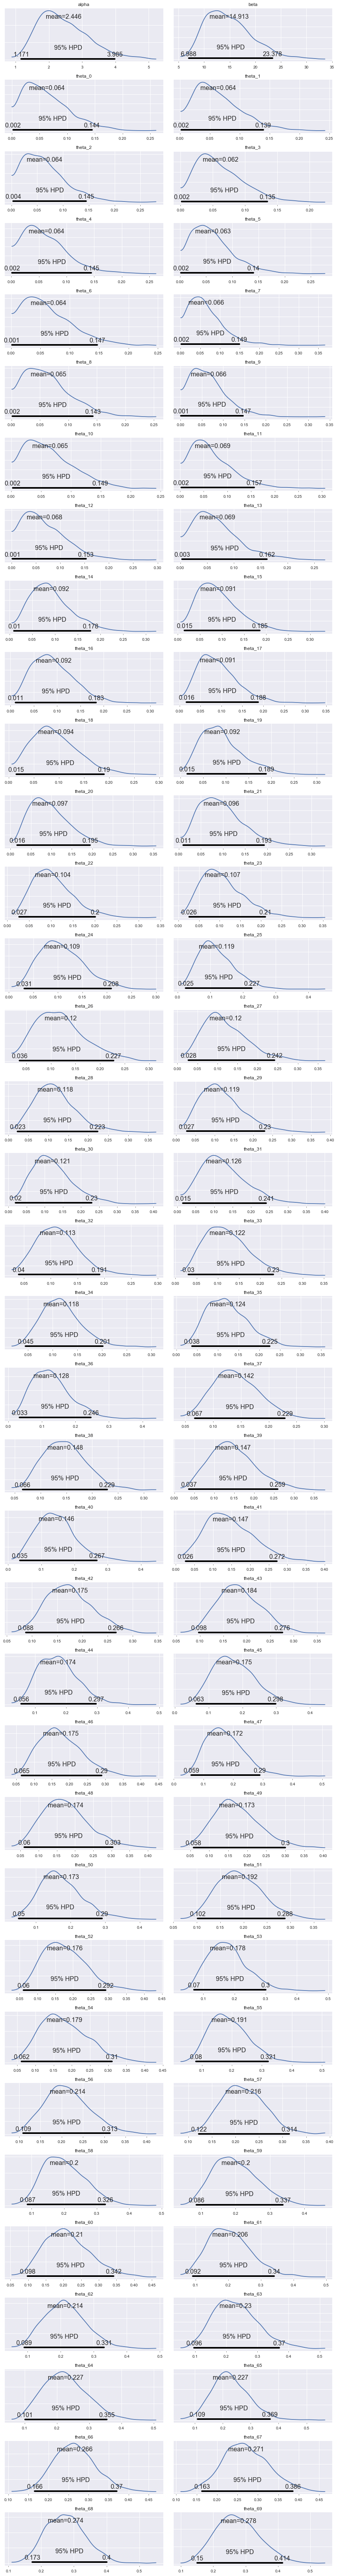

In [24]:
pm.plot_posterior(trace, kde_plot=True)